# Implement the KNN IRIS Image Classification based on a given set of training data samples.Read the training data from a .CSV file.

# Review of the iris dataset

In [1]:
import pandas as pd
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names = ['sepal_length','sepal_width','petal_length','petal_width','species']
iris = pd.read_csv(url, header=None, names=col_names)

In [2]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF'])

In [4]:
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

<Axes: xlabel='petal_length', ylabel='petal_width'>

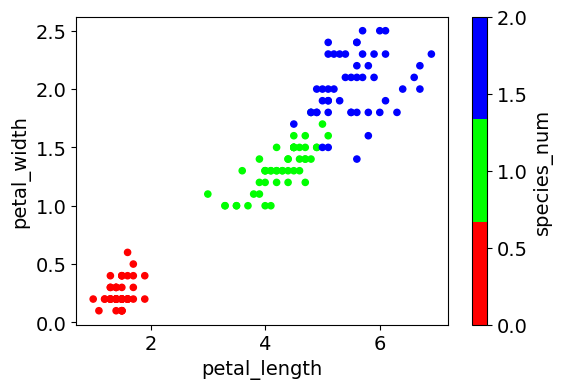

In [5]:
iris.plot(kind='scatter',x='petal_length', y='petal_width',c='species_num', colormap=cmap_bold)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

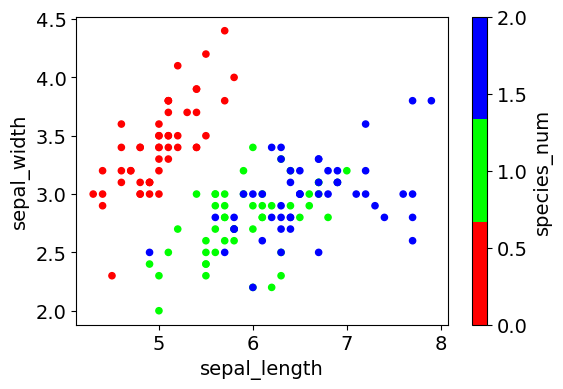

In [6]:
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_num', colormap=cmap_bold)

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [8]:
feature_cols = ['sepal_length','sepal_width','petal_length','petal_width']
X = iris[feature_cols]

In [9]:
X = iris.drop(['species','species_num'],axis=1)
X = iris.loc[:, 'sepal_length':'petal_width']
X = iris.iloc[:, 0:4]

In [10]:
y = iris.species_num

In [11]:
print(type(X))
print(type(X.values))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [12]:
print(type(y))
print(type(y.values))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [13]:
print (X.shape)

(150, 4)


In [14]:
print (y.shape)

(150,)


# Scikit-learn's 4-step modeling pattern

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)
type(knn)

sklearn.neighbors._classification.KNeighborsClassifier

In [20]:
print (knn)

KNeighborsClassifier(n_neighbors=1)


In [21]:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

In [22]:
knn.predict([[3,5,4,2]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

In [23]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(X_new)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2, 1], dtype=int64)

# Tuning a KNN model

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
knn.predict(X_new)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1, 1], dtype=int64)

In [25]:
# calculate predicted probabilities of class membership
knn.predict_proba(X_new)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[0. , 0.8, 0.2],
       [0. , 1. , 0. ]])